In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [2]:
HIV_df=pd.read_csv('HIV_dataset.csv') 

In [3]:
HIV_df.head(5)

,Age,Marital Status,STD,Educational Background,HIV TEST IN PAST YEAR,AIDS education,Places of seeking sex partners,SEXUAL ORIENTATION,Drug- taking,Status
0,22,2,2,1,1,2,Bar,1,1,1
1,20,2,2,1,2,1,None,1,2,2
2,23,1,1,1,2,1,None,3,2,2
3,24,1,2,1,1,1,Park,1,1,1
4,18,2,1,2,1,2,Internet,1,1,1


In [4]:
HIV_df.dtypes

Age                                int64
Marital Status                     int64
STD                                int64
Educational Background             int64
HIV TEST IN PAST YEAR              int64
AIDS education                     int64
Places of seeking sex partners    object
SEXUAL ORIENTATION                 int64
Drug- taking                       int64
Status                             int64
dtype: object

In [5]:
columns_to_drop=['Educational Background', 'Places of seeking sex partners']

In [6]:
HIV_df=HIV_df.drop(columns_to_drop,axis=1)

In [7]:
HIV_df.dtypes

Age                      int64
Marital Status           int64
STD                      int64
HIV TEST IN PAST YEAR    int64
AIDS education           int64
SEXUAL ORIENTATION       int64
Drug- taking             int64
Status                   int64
dtype: object

In [8]:
HIV_df.head(5)

,Age,Marital Status,STD,HIV TEST IN PAST YEAR,AIDS education,SEXUAL ORIENTATION,Drug- taking,Status
0,22,2,2,1,2,1,1,1
1,20,2,2,2,1,1,2,2
2,23,1,1,2,1,3,2,2
3,24,1,2,1,1,1,1,1
4,18,2,1,1,2,1,1,1


<Axes: >

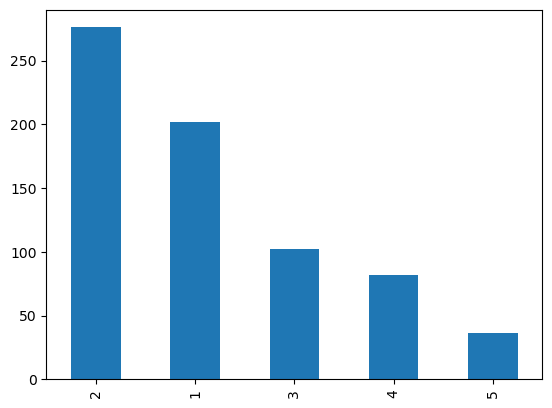

In [9]:
HIV_df['Marital Status'].value_counts().plot(kind='bar')

<Axes: >

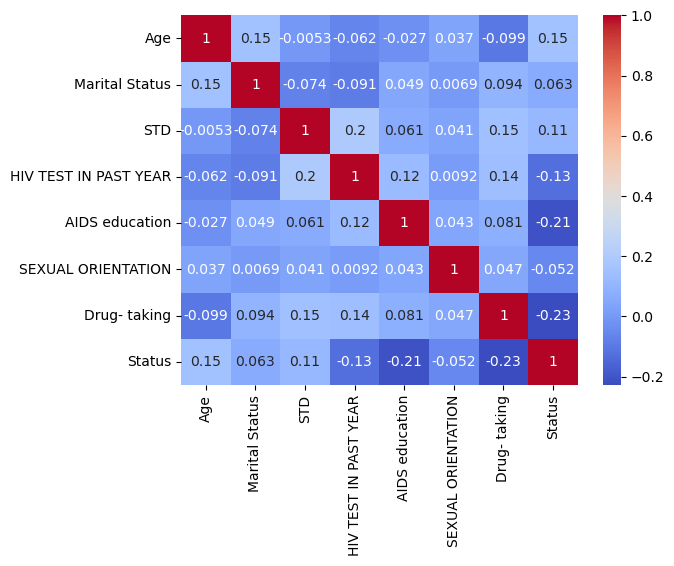

In [10]:
# Create a correlation matrix
corr_matrix = HIV_df.corr()



# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap = 'coolwarm', annot=True)

In [11]:
Y=HIV_df['Marital Status']

In [12]:
Y

0      2
1      2
2      1
3      1
4      2
      ..
693    2
694    1
695    2
696    1
697    5
Name: Marital Status, Length: 698, dtype: int64

In [13]:
X=HIV_df.drop('Marital Status', axis=1)

In [14]:
X

,Age,STD,HIV TEST IN PAST YEAR,AIDS education,SEXUAL ORIENTATION,Drug- taking,Status
0,22,2,1,2,1,1,1
1,20,2,2,1,1,2,2
2,23,1,2,1,3,2,2
3,24,2,1,1,1,1,1
4,18,1,1,2,1,1,1
...,...,...,...,...,...,...,...
693,19,1,2,2,1,2,1
694,47,2,2,1,3,2,2
695,34,1,1,1,2,1,2
696,25,2,2,2,1,1,1


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.3, random_state=101)

In [25]:
log_model=LogisticRegression()

In [26]:
X_train

,Age,STD,HIV TEST IN PAST YEAR,AIDS education,SEXUAL ORIENTATION,Drug- taking,Status
517,21,1,1,1,1,2,2
603,34,1,1,1,1,1,2
228,69,2,2,1,2,2,2
646,27,2,2,2,1,2,2
0,22,2,1,2,1,1,1
...,...,...,...,...,...,...,...
75,38,2,2,2,1,2,2
599,30,2,1,1,1,1,2
575,47,2,2,2,3,2,2
337,54,1,1,1,1,1,2


In [27]:
log_model.fit(X_train, y_train)

/home/student/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
predict=log_model.predict(X_test)

In [29]:
from sklearn.metrics import classification_report

In [30]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           1       0.34      0.30      0.32        69
           2       0.49      0.81      0.61        78
           3       0.22      0.07      0.11        27
           4       0.43      0.11      0.17        28
           5       0.33      0.12      0.18         8

    accuracy                           0.43       210
   macro avg       0.36      0.28      0.28       210
weighted avg       0.39      0.43      0.38       210

